<h2>Support Vector Machine</h2>

In this module, we learn to use Support Vector Machine to solve classification and regression problems

<h3>Linear Support Vector Machine for Binary Classification</h3>

We start with the simplest case: linear SVM for binary classification. Let's simulate a simple dataset with two features so we can visualize the model.

<b>⚠️ Important: all the visualizations in this module are only possible in one-dimensional or two-dimensional  (only one or two features besides the target) in data. In general, data with higher dimensionality cannot be visualized in 2D plot, so please be careful when adapting examples in this module to your assignment or project.</b>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#create some instances 
X = np.array([
    [1,1], [1.5,2], [2,1], [1.41,1.41], [1,2], [1,3],
    [3,3], [3,5], [3.5,2], [3.6,3.2], [3.1,3.5], [2.5,4]
])

Y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

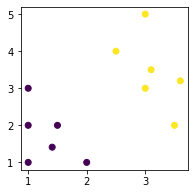

In [2]:
#and visualize them
#horizontal and vertical axes represent the two features
#colors represents the two classes
plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

What is the simplest way to classify the two classes in the above example?

We can draw a line that separates instances in the two classes, and predict the instances' classes based on their positions with respect to the boundary line (above or below the line)

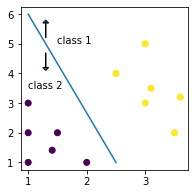

In [20]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot([1,2.5],[6,1])
plt.text(1.5,5,'class 1')
plt.arrow(1.3, 5.2, 0, 0.5, head_width=0.1, head_length=0.1)
plt.text(1,3.5,'class 2')
plt.arrow(1.3, 4.7, 0, -0.5, head_width=0.1, head_length=0.1)
plt.show()

However, there are an infinite number of lines that can separate the two classes in this example. Which one is the best one?

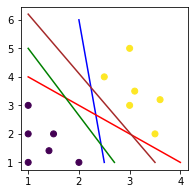

In [4]:
#and visualize them
#colors will represent the two classes in this case
plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot([2,2.5],[6,1], c='blue')
plt.plot([1,4],[4,1], c='red')
plt.plot([1,2.7],[5,1], c='green')
plt.plot([1,3.5],[6.2,1], c='brown')
plt.show()

A Linear SVM will draw an optimized boundary to separate the two classes. Let's find how it looks like

In [5]:
#now fit a linear SVM
from sklearn.svm import SVC

lsvc = SVC(C=1000, kernel='linear')
lsvc.fit(X,Y)

SVC(C=1000, kernel='linear')

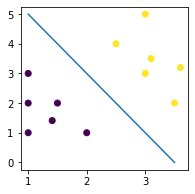

In [6]:
x1 = np.linspace(1,3.5,100)
x2 = (- lsvc.intercept_ - lsvc.coef_[0,0]*x1)/lsvc.coef_[0,1]
plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(x1,x2)
plt.show()

Now let's compare the random lines and the linear SVM line

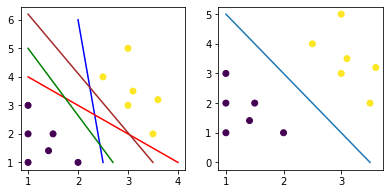

In [7]:
plt.figure(figsize=(6.5,3))

plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot([2,2.5],[6,1], c='blue')
plt.plot([1,4],[4,1], c='red')
plt.plot([1,2.7],[5,1], c='green')
plt.plot([1,3.5],[6.2,1], c='brown')

plt.subplot(122)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(x1,x2)
plt.show()

What is the difference? The line found by linear SVM go through the middle of the separation region. It is also equally distanced from the boundary of the two classes. Mathematically, we say this line <b>maximizes the margin between the two classes</b>. In the case of SVM, the margin is the distance between the boundaries of the two classes. The instances that directly lie on the two boundaries are called <b>support vectors</b>, hence the name support vector machine.

We can redraw the above example with the boundaries and support vectors added

In [8]:
##function to draw the SVM, you can ignore this part if you would like

def draw_svm(x,y,svm): #draw a the trained svm and its separation line, boundaries, and support vectors
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, 5)
    yy = a * xx - (svm.intercept_[0]) / w[1]

    margin = 1 / np.sqrt(np.sum(svm.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")
    plt.xlim(0.8,3.8)
    plt.ylim(0.8,5.2)
    plt.scatter(lsvc.support_vectors_[:, 0], lsvc.support_vectors_[:, 1], s=80)
    plt.scatter(x[:,0], x[:, 1], c=y)

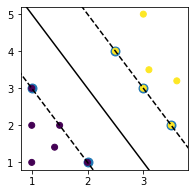

In [9]:
plt.figure(figsize=(3,3))
draw_svm(X,Y,lsvc)
plt.show()

Mathematically, the line that linear SVM seeks in the above example has the equation as below

$b + w_1x1 + w_2x2 = 0$

The upper boundary is then

$b + w_1x1 + w_2x2 = 1$

And the lower boundary

$b + w_1x1 + w_2x2 = -1$

SVM seeks the line that separates the two classes while maximizing their margin 

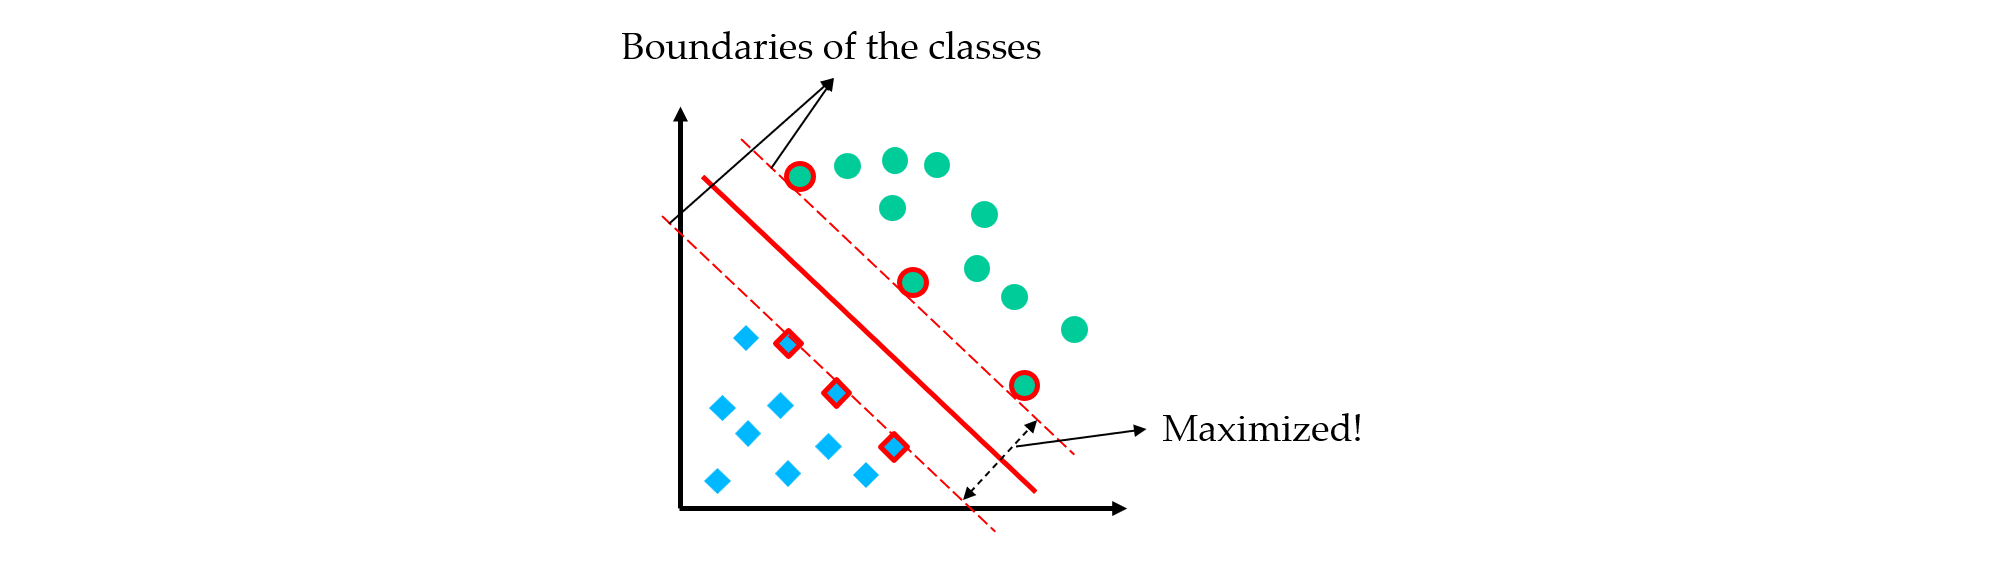

We can get $w_0, w_1, w_2$ from the model with intercept_ and coef_

In [10]:
lsvc.intercept_ #b

array([-3.49912426])

In [11]:
lsvc.coef_ #w1 and w2

array([[0.99976331, 0.49988166]])

So, the rounded equation of the separation line would be

$-3.5 + x_1 + 0.5x_2 = 0$

In general, we will not have a perfect separation most of the times. Let's make the example a bit more complicated with less clear boundaries and fit a linear svm again

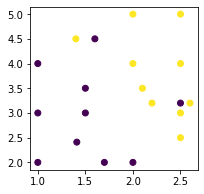

In [12]:
#create some instances 
X = np.array([
    [1,2], [1.5,3], [2,2], [1.41,2.41], [1,3], [1,4], [1.6,4.5], [2.5,3.2], [1.5,3.5], [1.7,2],
    [2.2,3.2], [2,5], [2.5,2.5], [2.6,3.2], [2.1,3.5], [2.5,4], [1.4,4.5], [2,4], [2.5,3], [2.5,5]
])

Y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

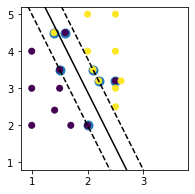

In [13]:
lsvc = SVC(C=1000, kernel='linear')
lsvc.fit(X,Y)

plt.figure(figsize=(3, 3))
draw_svm(X,Y,lsvc)
plt.show()

With errors, the optimal separation is less obvious. Furthermore, the support vectors are now all points lying between the boundaries of the classes. This introduce a regularization parameter "C" that decides how "soft" the boundaries are. Smaller C leads to softer boundaries -- more support vectors can be inside the boundaries regions, and higher C means harder boundaries with less support vectors in that regions.

Let's try compare C=0.1 and C=100

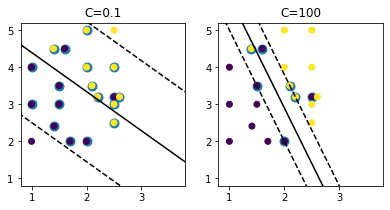

In [14]:
plt.figure(figsize=(6.5,3))

plt.subplot(121)
lsvc = SVC(C=0.1, kernel='linear')
lsvc.fit(X,Y)
draw_svm(X,Y,lsvc)
plt.title("C=0.1")

plt.subplot(122)
lsvc = SVC(C=100, kernel='linear')
lsvc.fit(X,Y)
draw_svm(X,Y,lsvc)
plt.title("C=100")

plt.show()

You can see, with a softer margin, more the data is now in the boundary region and become support vectors. Furthermore, different levels of C yield different performances. In general, C is a hyperparameter that needs finetuning.

<h4>The Multi-Dimensional Case</h4>

In the case of having more than two columns, the separation is considered a <b>hyperplane</b> and has the below equation

$b + w_1x1 + w_2x2 + \dots + w_kx_k = 0$

The upper boundary is then

$b + w_1x1 + w_2x2 + \dots + w_kx_k = 1$

And the lower boundary

$b + w_1x1 + w_2x2 + \dots + w_kx_k = -1$

Similarly like before, we can get $w_0, w_1, w_2$ from the model with intercept_ and coef_.

The training objective of a support vector is to maximize the margin between the two classes, which, after some mathematical manipulation, is as below:

$\max \dfrac{2}{\sum_i w_i^2}$

Or equivalently, as a minimization problem (since training usually is to minimize something instead of maximizing)

$\min \dfrac{\sum_i w_i^2}{2}$

With the soft boundary term, we have the full training objective as

$\min \dfrac{\sum_i w_i^2}{2} + C\sum_j \epsilon_j$

with $\epsilon_j$ is the error of instance $j$.

<h4>Non-linearly Separable Data</h4>

The previous examples are on <b>linearly separable</b> data -- the two classes can be separated by a straight line. This case is quite rare in real world data where the boundary may be curves. In the example below, the data is not linearly separable because we cannot draw a straight line to separate the classes.

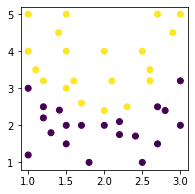

In [15]:
#create some instances 
X = np.array([
    [1.2,2.2], [1.3,1.8], [2,2], [1.41,2.41], [1,3], [1,1.2], [1.2,2.5], [2.8,2.4], [1.5,1.5], [1.7,2],
    [3,2], [2.7,2.5], [1.8,1], [2.41,1.71], [2.2,1.75], [2.2,2.1], [3,3.2], [1.5,2], [2.5,1], [2.7,1.5],
    [1.2,3.2], [1,5], [1.7,2.6], [1.6,3.2], [1.1,3.5], [1.5,4], [1.4,4.5], [1,4], [1.5,3], [1.5,5],
    [2.6,3.2], [2.7,5], [2.3,2.5], [2.1,3.2], [2.6,3.5], [2,4], [2.9,4.5], [2.5,4], [2,2.4], [3,5]
])

Y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

<h4>Kernel SVM</h4>

SVM can be adapted to the nonlinearly separable case using the <b>kernel trick</b>.

Very roughly speaking, the kernel trick means to use a <b>kernel function</b> to map data to an implicit higher dimensional space where instances of different classes suppose to be more linearly separable.
- Implicit means we don’t actually know that new space to which the kernel function mapped data but only know the instances’ similarity, represented by the values of the kernel function

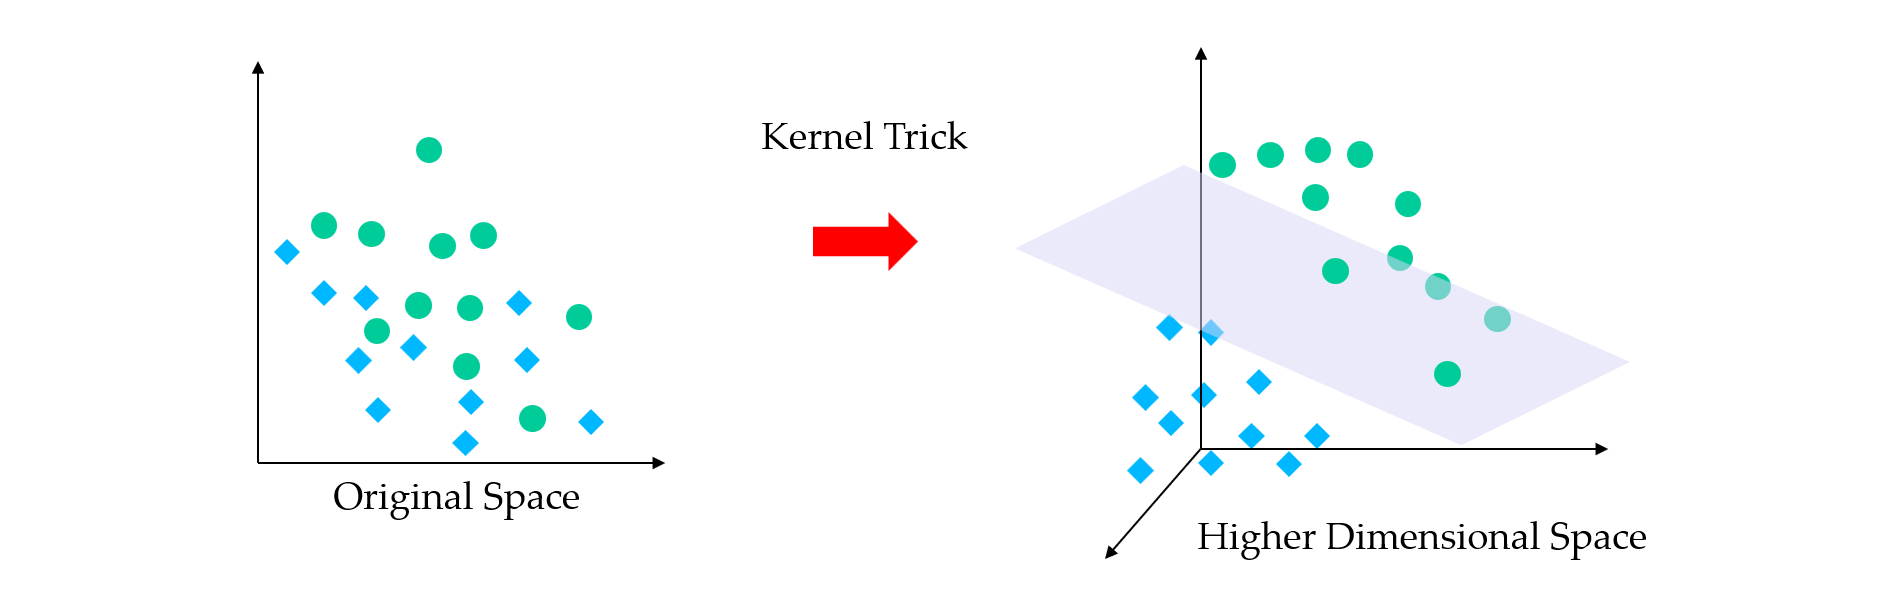

A kernel function computes the similarity of two data instances. There are two most commonly used kernel functions:

- Polynomial kernel: $K(X_1,X_2) = (X_1\cdot X_2 + c_0 )^d$
- Radial Basis Function (RBF) kernel, or Gaussian kernel: $K(X_1,X_2) = e^{−\gamma ‖X_1−X_2 ‖_2}$

The hyperparameters in each kernel function:
- Polynomial: the term $c_0$ and the degree $d$
- RBF/Gaussian: the term $\gamma$ (gamma)

Let's try how each of these SVMs looks like

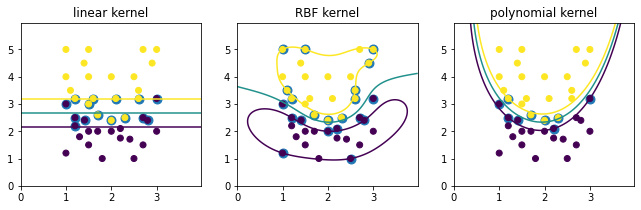

In [16]:
#this part is just for drawing the SVMs, you can ignore if you would like

from sklearn.svm import SVC

lsvc = SVC(kernel='linear').fit(X,Y)
svc_rbf = SVC(kernel='rbf', gamma=1, C=2).fit(X,Y)
svc_poly = SVC(kernel='poly',degree=3, coef0=2).fit(X,Y)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['linear kernel',
          'RBF kernel',
          'polynomial kernel']


plt.figure(figsize=(11,3))
for i, clf in enumerate((lsvc, svc_rbf, svc_poly)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1, 3, i+1)

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[-1,0,1])

    # Plot also the training points
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title(titles[i])

plt.show()

<h4>Real Example</h4>

We will return to the examples in the Logistic regression module

In [17]:
data = pd.read_csv('heart_disease.csv')

from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = trainX.columns[(trainX.dtypes == np.int64) | (trainX.dtypes == np.float64)]
cat_cols = ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']

#create a transform function for FunctionTransformer
def remove_0_choles(X):
    X.loc[X['Cholesterol']==0, 'Cholesterol'] = np.nan
    return X
num_pipeline = Pipeline([
    ('remove 0 cholesterol', FunctionTransformer(remove_0_choles, validate=False)),
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant',fill_value='missing')),
    ('encode', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

trainX_prc = full_pipeline.fit_transform(trainX)
testX_prc = full_pipeline.transform(testX)  

trainX_prc.shape, trainY.shape, testX_prc.shape, testY.shape

((734, 20), (734,), (184, 20), (184,))

Now we can try the LinearSVC. I will finetune it directly with GridSearchCV. First, l2 regularization:

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

lsvc = SVC(kernel='linear', max_iter=10000)

grid_search = GridSearchCV(lsvc, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\sklearn\svm\

GridSearchCV(cv=5, estimator=SVC(kernel='linear', max_iter=10000),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='accuracy')

Best training model:

In [19]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1}
0.8583170254403132


In [20]:
best_l2_lsvc = grid_search.best_estimator_
best_l2_lsvc.score(testX_prc, testY)

0.8967391304347826

<h3> Using Kernel SVM </h3>

Now we will try kernel SVM on the credit approval data. We will directly finetune the model (without fitting the default model). We can actually specify all hyperparameters in one grid search (including the kernel functions).

One note is that SVM is relatively complicated, so if you specify too many hyperparameter values, the gridsearch will run for a long time.

In [21]:
from sklearn.svm import SVC

svc = SVC()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
#     'coef0' : [-1, 0, 1], #optional, may significantly increase training times in some cases
    'degree' : [2,3,4],
    'gamma' : [0.01, 0.1, 1, 10, 100]
}]

grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

Let's check the best model

In [22]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.8610460577673692


And test it on testing data

In [23]:
best_svc = grid_search.best_estimator_
best_svc.score(testX_prc, testY)

0.8967391304347826

Compare to Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

param_grid = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

logistic = LogisticRegression(penalty='l2', max_iter=5000)

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(trainX_prc,trainY)

print('CV accuracy:', grid_search.best_score_) #accuracy

best_l2_logistic = grid_search.best_estimator_
print('Testing accuracy:', best_l2_logistic.score(testX_prc, testY)) #accuracy

CV accuracy: 0.8596868884540116
Testing accuracy: 0.8858695652173914


<h4>Summarize all Results</h4>

I will also include Logistic regression

|Model|Training CV Accuracy| Testing Accuracy|
|-----|--------------------|-----------------|
|L2 Logistic|0.860|0.886|
|Linear SVM|0.858|0.897|
|Kernel SVM|0.861|0.897|

We can see that SVMs are better than Logistic regression. 

<h3>SVM for Multilabel Classification</h3>

Similar to Logistic Regression, SVM is designed for binary classification. For multilabel classification problem, we apply the same strategy of 1 vs. rest: given 𝑛 unique labels in the target, build 𝑛 models to predict whether an instance belong to each class or not.

For example, if there are four labels 1, 2, 3, 4 then build 4 models
- 1 vs. not 1
- 2 vs. not 2
- 3 vs. not 3
- 4 vs. not 4

And use the decision from the model with the highest score. In SKLearn, you can directly use fit() on multilabel data without having to change anything in SKLearn

We will use the body performance data again

In [25]:
data = pd.read_csv('bodyPerformance.csv')

X = data.drop('class', axis=1)
y = data['class']
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.7)

num_cols = trainX.columns[(trainX.dtypes == np.int64) | (trainX.dtypes == np.float64)]
cat_cols = ['gender']
num_pipeline = Pipeline([
    ('standardize', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encode', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

trainX_prc = full_pipeline.fit_transform(trainX)
testX_prc = full_pipeline.transform(testX)

trainX_prc.shape, trainY.shape, testX_prc.shape, testY.shape

((4017, 12), (4017,), (9376, 12), (9376,))

And fit the SVM. I will not fit linear SVM anymore. Also, Polynomial kernel is very expensive to train, so I will just fit RBF kernel. In practice, RBF kernel is the most common type of kernel for SVM.

In [26]:
svc = SVC()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.01, 0.1, 1, 10, 100]
}]

grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

The best model is

In [27]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.6713965646004482


And applied to the testing data

In [28]:
best_svc = grid_search.best_estimator_
best_svc.score(testX_prc, testY)

0.6765145051194539

Compare to L1 SoftMax regression (the better model last time)

In [29]:
param_grid = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

logistic = LogisticRegression(multi_class='multinomial', penalty='l1', max_iter=5000, solver='saga')
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(trainX_prc,trainY)

print('CV accuracy: ', grid_search.best_score_)

best_l1_logistic = grid_search.best_estimator_
print('Testing accuracy', best_l1_logistic.score(testX_prc, testY))

CV accuracy:  0.6113975576662145
Testing accuracy 0.6234001706484642


<h4>Result Summary</h4>

Compare to Logistic regression and SoftMax regression:

|Model|Training CV Accuracy| Testing Accuracy|
|-----|--------------------|-----------------|
|L2 SoftMax|0.611|0.623|
|Kernel SVM|0.671|0.677|

In this case, SVM signficantly outperforms SoftMax regression :)

<h3> Support Vector Regressor </h3>
SVM can be modified to work on regression problem. We call this model Support Vector Regressor (SVR). 
In the regression problem, SVR seeks a hyperplane that minimize the margin of data – distance between the two boundaries of the instances in this case. Instances lying on the boundaries are still called Support Vectors

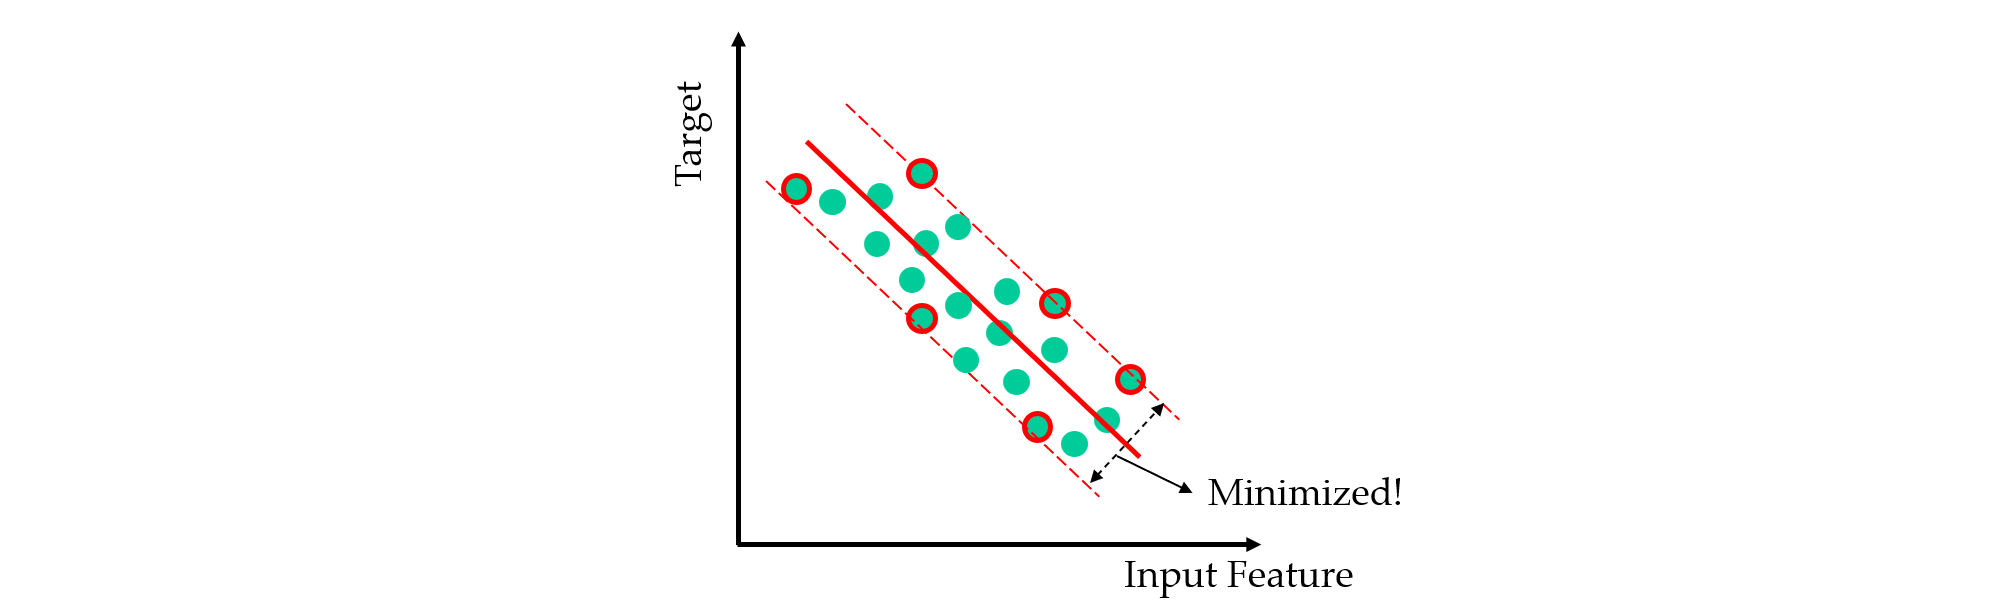

In SKLearn, fitting SVR is pretty much identical to fitting SVC (except for target must be continuous). All hyperparameters of SVR are the same as SVC.

<h4>Toy Example</h4>

We will begin with a toy example of a dataset with a single feature and a target. This allows us to draw the prediction made by SVR

Text(0, 0.5, 'Target')

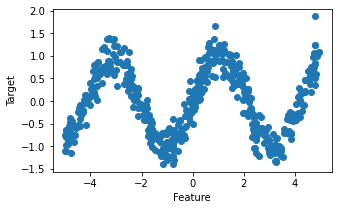

In [30]:
X = np.sort(np.random.uniform(-5,5,500))
y = np.sin(X*1.5) + np.random.normal(0,0.25,500)

plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.xlabel('Feature')
plt.ylabel('Target')

Text(0, 0.5, 'Target')

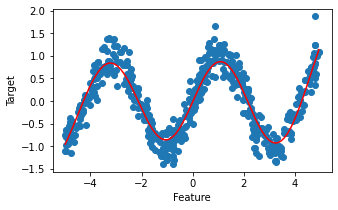

In [31]:
from sklearn.svm import SVR

y_pred = svr.predict(X.reshape(-1,1))

plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,y_pred, color='red')
plt.xlabel('Feature')
plt.ylabel('Target')

As you can see, SVR can automatically learn the curve pattern in data without you having to manually engineer more features. Compare to a linear model:

Text(0, 0.5, 'Target')

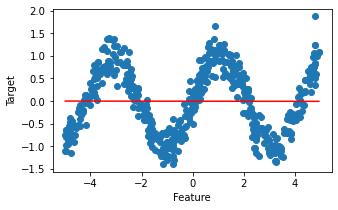

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X.reshape(-1,1),y)
y_pred = ridge.predict(X.reshape(-1,1))

plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,y_pred, color='red')
plt.xlabel('Feature')
plt.ylabel('Target')

You will have to manually add the polynomial features, and even then, the performance may not be as good

Text(0, 0.5, 'Target')

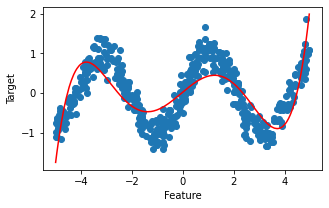

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1,1))

ridge = Ridge().fit(X_poly,y)
y_pred = ridge.predict(X_poly)

plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,y_pred, color='red')
plt.xlabel('Feature')
plt.ylabel('Target')

<h4>Practical Example</h4>

In the below example, we use the auto-mpg data - predicting miles-per-gallon of cars using their other features

First, import and preprocessing data:

In [34]:
auto = pd.read_csv('auto-mpg.csv')

from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(auto):
    train_set = auto.loc[train_index]
    test_set = auto.loc[test_index]
    
trainX = train_set.drop('mpg',axis=1)
trainY = train_set['mpg']
testX = test_set.drop('mpg',axis=1)
testY = test_set['mpg']

trainX.shape, testX.shape, trainY.shape, testY.shape

((298, 7), (100, 7), (298,), (100,))

In [35]:
#pipeline for numeric features
#we need to impute horsepower
num_cols = trainX.columns[:-1] #because the last column is class
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

#pipeline for class features
cat_cols = trainX.columns[-1:] #because the last column is class
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

#full pipeline - combine numeric and class pipelines
full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

trainX_prc = full_pipeline.fit_transform(trainX)
testX_prc = full_pipeline.transform(testX)

Now we finetune a SVR. You can see it is very similar to the kernel SVC we used before. For the same reason as before, I won't try Polynomial kernel.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='r2', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='r2')

The finetuned model (note that score is now R2 since we are doing regression):

In [37]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.8641016605334603


And the testing performance 

In [38]:
best_svr = grid_search.best_estimator_
best_svr.score(testX_prc, testY)

0.9050367149992335

Compare to linear model using square transformation

In [39]:
param_grid = [{'alpha': [0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]
ridge_reg = Ridge()

trainX_log = np.hstack([trainX_prc, trainX_prc**2]) #quickly create the squared features without pipeline
testX_log = np.hstack([testX_prc, testX_prc**2])
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(trainX_log,trainY)
print('Training CV R2: ', grid_search.best_score_)
best_ridge_gs = grid_search.best_estimator_
print('Testing R2', best_ridge_gs.score(testX_log, testY))

Training CV R2:  0.8565628517865459
Testing R2 0.8932033174829478


<h4> Result Summary </h4>

|Model|Training CV R2| Testing R2|
|-----|--------------|-----------|
|Ridge|0.856         |0.893      |
|SVR  |0.864         |0.905      |

Once again, SVR outperforms the linear model without the needs of engineering polynomial features. 

<h4> Some Notes</h4>

In general, SVM is very powerful, however is quite a bit more complex than some other models (especially linear ones). You should always try SVM if you can, however, SVM is not recommended for data of over 10,000 instances unless you have a very powerful training system, or a lot of time to spend.